In [61]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function (pyplot)
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [62]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [63]:
# copy demo into current directory
ac.copydemo('pp2')

# start AUTO with runner object
runner = ra.runAUTO()

print("\n***Compute stationary solution families***")
pp2 = ac.run('pp2', runner=runner)
ac.save('pp2')

print("\n***Compute periodic solution families***")
ac.run(pp2('HB1'), ICP=['quota','PERIOD'], IPS=2, NPR=2,
    UZSTOP={'quota': [0.0, 1.0], 'PERIOD': 36.0}, runner=runner)
ac.save('ps')
ac.append('pp2')

Copying demo pp2 ... done

***Compute stationary solution families***
gfortran -fopenmp -O -c pp2.f90 -o pp2.o
gfortran -fopenmp -O pp2.o -o pp2.exe /auto/lib/*.o
Starting pp2 ...

  BR    PT  TY  LAB     quota        L2-NORM         fish         sharks    
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    12  BP    2   6.00000E-01   0.00000E+00   0.00000E+00   0.00000E+00
   1    19  UZ    3   1.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00

  BR    PT  TY  LAB     quota        L2-NORM         fish         sharks    
   2    21  BP    4   8.21904E-01   3.33333E-01   3.33333E-01   0.00000E+00
   2    25  LP    5   8.32929E-01   4.11162E-01   4.11162E-01   0.00000E+00
   2    79  UZ    6   2.52388E-06   9.99999E-01   9.99999E-01   0.00000E+00

  BR    PT  TY  LAB     quota        L2-NORM         fish         sharks    
   2    10  UZ    7   3.76454E-01   2.50000E-01  -2.50000E-01   0.00000E+00

  BR    PT  TY  LAB     quota        L2-NORM         

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   9     4       12   6.72635E-01   4.93988E-01   3.76068E-01   4.37347E-01   1.05098E+01
   9     6       13   6.74476E-01   4.92359E-01   4.06390E-01   4.80634E-01   1.07334E+01
   9     8       14   6.77204E-01   4.89763E-01   4.38024E-01   5.18909E-01   1.10918E+01
   9    10       15   6.80756E-01   4.86052E-01   4.70697E-01   5.50932E-01   1.16162E+01
   9    12       16   6.85012E-01   4.81093E-01   5.03880E-01   5.75470E-01   1.23547E+01
   9    14       17   6.89760E-01   4.74855E-01   5.36742E-01   5.91630E-01   1.33795E+01
   9    16       18   6.94676E-01   4.67513E-01   5.68032E-01   5.99268E-01   1.47957E+01
   9    18       19   6.99324E-01   4.59534E-01   5.96170E-01   5.99429E-01   1.67572E+01
   9    20       20   7.03216E-01   4.51655E-01   6.19447E-01   5.94700E-01   1.94886E+01
   9    22       21   7.05948E-01   4.44679E-01   6.36352E-01   5.88713E-01   2.33184E+01
   9    24       22   7.07420E-01   4.39086E-01   6.46329E-01   5.84504E-01   2.87287E+01
   9    26

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Created plot


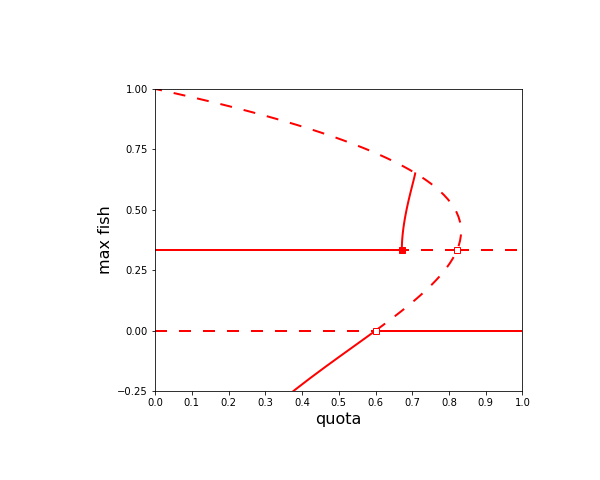

In [67]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('pp2')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

Created plot


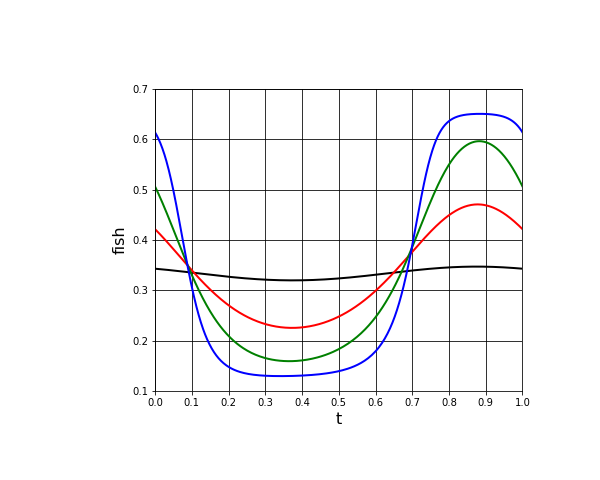

In [65]:
# plot four solutions vs t

p = ac.plot('pp2')
p.config(type='solution')
p.config(solution_x='t')
p.config(solution_y=[0])
p.config(label=[11, 15, 19, 23])
p.config(color_list="black red green blue")
p.config(coloring_method="curve")
p.savefig('b.png')
display(Image.open('b.png'))

Created plot


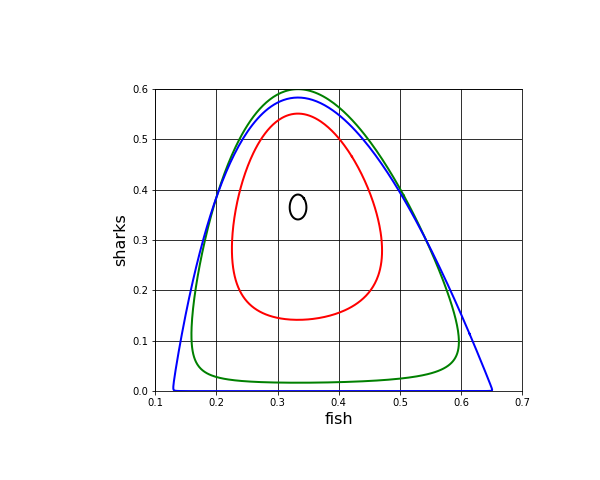

In [66]:
# plot four solutions u2 vs u1 (sharks vs fish)

p = ac.plot('pp2')
p.config(type='solution')
p.config(solution_x=[0])
p.config(solution_y=[1])
p.config(color_list="black red green blue")
p.config(coloring_method="curve")
p.config(label=[11, 15, 19, 23])
p.savefig('b.png')
display(Image.open('b.png'))

In [35]:
# clean up files

ac.clean()
ac.delete('pp2')
ac.delete('ps')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.ab ... done
Deleting s.ab ... done
Deleting d.ab ... done
